In [2]:
import pandas as pd
import numpy as np
import io
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)
df.to_csv('preprocessed_weather_data.csv', index=False)

print(df.head())


Saving Weather_2023prcp-us.csv to Weather_2023prcp-us.csv
   Latitude  Longitude  Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  \
0   24.5625   -81.8125     5.24     1.02     7.77    46.53    86.21    85.13   
1   24.5625   -81.7708     5.31     0.92     7.31    46.12    86.39    82.94   
2   24.5625   -81.7292     6.88     0.94     6.84    46.00    79.22    78.26   
3   24.5625   -81.6875     8.27     1.15     6.57    46.60    73.11    74.49   
4   24.6042   -81.6458    10.39     2.41     7.44    48.07    65.89    71.90   

   Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  
0    43.95   151.67   201.36     84.30     40.90    150.39  
1    46.31   148.96   200.69     84.83     43.38    149.22  
2    53.31   134.84   184.40     78.42     50.26    146.70  
3    59.44   124.38   170.03     72.80     58.13    144.46  
4    69.79   114.72   153.93     66.21     73.57    142.01  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469758 entries, 0 to 469757
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Latitude   469758 non-null  float64
 1   Longitude  469758 non-null  float64
 2   Month_1    469758 non-null  float64
 3   Month_2    469758 non-null  float64
 4   Month_3    469758 non-null  float64
 5   Month_4    469758 non-null  float64
 6   Month_5    469758 non-null  float64
 7   Month_6    469758 non-null  float64
 8   Month_7    469758 non-null  float64
 9   Month_8    469758 non-null  float64
 10  Month_9    469758 non-null  float64
 11  Month_10   469758 non-null  float64
 12  Month_11   469758 non-null  float64
 13  Month_12   469758 non-null  float64
dtypes: float64(14)
memory usage: 50.2 MB
None


In [4]:
print(df.describe())

            Latitude      Longitude        Month_1        Month_2  \
count  469758.000000  469758.000000  469758.000000  469758.000000   
mean       39.394954     -99.419242      73.410614      50.547514   
std         5.319971      13.544606      76.146401      45.185526   
min        24.562500    -124.687500       0.190000       0.000000   
25%        35.229200    -110.479200      22.830000      14.940000   
50%        39.604200     -99.520800      48.530000      38.900000   
75%        43.729200     -89.187500     102.770000      73.900000   
max        49.354200     -67.020900    1294.330000     613.100000   

             Month_3        Month_4        Month_5        Month_6  \
count  469758.000000  469758.000000  469758.000000  469758.000000   
mean       72.348948      60.855863      65.286053      72.689554   
std        70.221547      56.509688      40.762015      54.655319   
min         0.000000       0.000000       0.000000       0.000000   
25%        24.400000      16.0100

In [5]:
print(df.head())

   Latitude  Longitude  Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  \
0   24.5625   -81.8125     5.24     1.02     7.77    46.53    86.21    85.13   
1   24.5625   -81.7708     5.31     0.92     7.31    46.12    86.39    82.94   
2   24.5625   -81.7292     6.88     0.94     6.84    46.00    79.22    78.26   
3   24.5625   -81.6875     8.27     1.15     6.57    46.60    73.11    74.49   
4   24.6042   -81.6458    10.39     2.41     7.44    48.07    65.89    71.90   

   Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  
0    43.95   151.67   201.36     84.30     40.90    150.39  
1    46.31   148.96   200.69     84.83     43.38    149.22  
2    53.31   134.84   184.40     78.42     50.26    146.70  
3    59.44   124.38   170.03     72.80     58.13    144.46  
4    69.79   114.72   153.93     66.21     73.57    142.01  


In [6]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Latitude     0
Longitude    0
Month_1      0
Month_2      0
Month_3      0
Month_4      0
Month_5      0
Month_6      0
Month_7      0
Month_8      0
Month_9      0
Month_10     0
Month_11     0
Month_12     0
dtype: int64


In [7]:
df = df.dropna()
df = df.drop_duplicates()

In [8]:
df['Annual_Avg_Precipitation'] = df[['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
                                    'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']].mean(axis=1)
print(df['Annual_Avg_Precipitation'])

0         75.372500
1         75.198333
2         72.172500
3         69.952500
4         68.860833
            ...    
469753    39.322500
469754    39.193333
469755    40.077500
469756    39.882500
469757    39.739167
Name: Annual_Avg_Precipitation, Length: 469758, dtype: float64


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Latitude', 'Longitude']])
df[['Latitude', 'Longitude']] = scaled_features
print(scaled_features)

[[-2.78807361  1.29990946]
 [-2.78807361  1.30298818]
 [-2.78807361  1.30605952]
 ...
 [ 1.87205098  0.31550915]
 [ 1.87205098  0.31858048]
 [ 1.87205098  0.3216592 ]]


In [10]:
# identify outliers using IQR method
Q1 = df['Annual_Avg_Precipitation'].quantile(0.25)
Q3 = df['Annual_Avg_Precipitation'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find outliers
outliers = df[(df['Annual_Avg_Precipitation'] < lower_bound) | (df['Annual_Avg_Precipitation'] > upper_bound)]
print(outliers)

# remove outliers
df = df[(df['Annual_Avg_Precipitation'] >= lower_bound) & (df['Annual_Avg_Precipitation'] <= upper_bound)]

        Latitude  Longitude  Month_1  Month_2  Month_3  Month_4  Month_5  \
328    -2.560948   1.419884     1.55   100.98    75.22   277.22   155.89   
351    -2.553110   1.404505     1.28   115.69    62.89   264.25   173.99   
352    -2.553110   1.407576     1.29   115.17    64.65   268.84   170.45   
353    -2.553110   1.410655     1.26   112.35    65.58   269.98   164.22   
354    -2.553110   1.413733     1.27   104.58    64.59   274.59   159.55   
...          ...        ...      ...      ...      ...      ...      ...   
466415  1.770227  -1.668678   250.09   250.26   163.85   221.71    43.02   
466416  1.770227  -1.665606   251.35   264.44   176.01   226.98    41.30   
466417  1.770227  -1.662528   283.78   296.68   212.94   251.25    43.80   
466418  1.770227  -1.659449   284.89   300.90   212.65   253.48    45.45   
466419  1.770227  -1.656378   289.73   327.67   214.30   267.90    49.96   

        Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  \
328      29

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Annual_Avg_Precipitation'])
y = df['Annual_Avg_Precipitation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (373760, 14)
X_test shape: (93441, 14)
y_train shape: (373760,)
y_test shape: (93441,)


In [12]:
print("\nBasic Statistical Summary:")
print(df['Annual_Avg_Precipitation'].describe())


Basic Statistical Summary:
count    467201.000000
mean         61.313146
std          32.626611
min           3.607500
25%          34.198333
50%          56.371667
75%          86.901667
max         167.341667
Name: Annual_Avg_Precipitation, dtype: float64


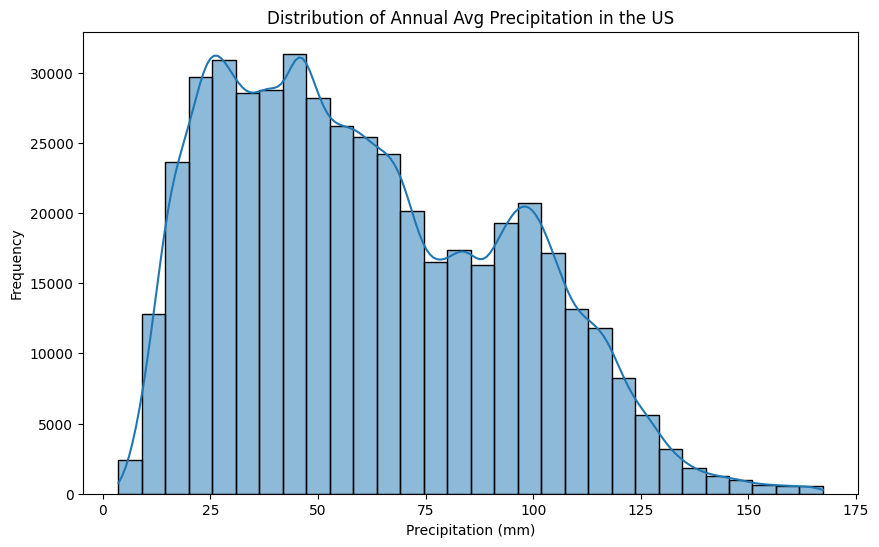

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Avg_Precipitation'], kde=True, bins=30)
plt.title('Distribution of Annual Avg Precipitation in the US')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

In [19]:
import folium
map_center = [39.5, -98.35]  # Rough center of the contiguous USA
m = folium.Map(location=map_center, zoom_start=4)
for index, row in df.iterrows():
    # Use annual average precipitation to determine the color or size of the circle
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  # You can adjust this to reflect the precipitation magnitude
        color='blue',  # Use a gradient or different colors for more detail
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Precipitation: {row['Annual_Avg_Precipitation']:.2f} mm"
    ).add_to(m)

m

In [13]:
# City with the Highest Precipitation Level
city_highest_precipitation = df.loc[df['Annual_Avg_Precipitation'].idxmax()]
print(f'City with the Highest Annual Average Precipitation:\n{city_highest_precipitation}')

# Correlation Matrix
correlation_matrix = df.corr()
print('Correlation Matrix:')
print(correlation_matrix)

City with the Highest Annual Average Precipitation:
Latitude                     -0.023337
Longitude                    -1.561011
Month_1                     504.350000
Month_2                     322.530000
Month_3                     561.470000
Month_4                      53.630000
Month_5                      92.980000
Month_6                      52.360000
Month_7                       0.000000
Month_8                      18.840000
Month_9                      40.750000
Month_10                     52.260000
Month_11                    132.560000
Month_12                    176.370000
Annual_Avg_Precipitation    167.341667
Name: 224890, dtype: float64
Correlation Matrix:
                          Latitude  Longitude   Month_1   Month_2   Month_3  \
Latitude                  1.000000  -0.179403 -0.223410 -0.199780 -0.113072   
Longitude                -0.179403   1.000000  0.130659  0.254037  0.011690   
Month_1                  -0.223410   0.130659  1.000000  0.730296  0.792037  